# Importing The needed libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt


# Loading the dataset

In [2]:
df = pd.read_csv("data-input.csv")

df

,L_label,a_label,b_label,Construction,BackingLayer2nd,PatternLayer3rd,YarnCode,L_weft,a_weft,b_weft,WeftDenier,WeftYarnType,WarpColor,WeavingMachine
0,34.478,3.335,-12.089,SD88,White,NONE,LY0751213-005855,27.313,3.818,-10.501,75D,1213,White,Satin
1,30.657,3.465,-10.771,SDD248,White,NONE,LY0751213-005855,27.313,3.818,-10.501,75D,1213,Black,Satin
2,30.980,3.437,-10.747,SDD248,White,NONE,LY0751213-005855,27.313,3.818,-10.501,75D,1213,White,Satin
3,29.781,3.538,-10.785,DD164,White,NONE,LY0751213-005855,27.313,3.818,-10.501,75D,1213,Black,Taffeta
4,29.579,3.607,-10.847,DD164,White,NONE,LY0751213-005855,27.313,3.818,-10.501,75D,1213,White,Taffeta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114942,84.950,-10.300,40.410,D88,White,B,LY0501112-004933-WT-D88-B,NaN,NaN,NaN,75D,1211,White,Taffeta
114943,74.460,-29.410,43.570,SD88,Black,B,LY0010-003950-75-BS-SD88-B,NaN,NaN,NaN,75D,1211,Black,Satin
114944,99.510,-44.600,73.730,D88,White,B,LY0010-003950-75-WT-D88-B,NaN,NaN,NaN,75D,1211,White,Taffeta
114945,52.720,27.030,27.760,SD510,Black,B,LY1001113-005981-BS-SD510-B,NaN,NaN,NaN,75D,1211,Black,Satin


# Cleaning the data and creating data-cleaned file

Dropping YarnCode Column (not helpful in training our model)

In [3]:
df.drop('YarnCode',inplace=True,axis=1)

df

,L_label,a_label,b_label,Construction,BackingLayer2nd,PatternLayer3rd,L_weft,a_weft,b_weft,WeftDenier,WeftYarnType,WarpColor,WeavingMachine
0,34.478,3.335,-12.089,SD88,White,NONE,27.313,3.818,-10.501,75D,1213,White,Satin
1,30.657,3.465,-10.771,SDD248,White,NONE,27.313,3.818,-10.501,75D,1213,Black,Satin
2,30.980,3.437,-10.747,SDD248,White,NONE,27.313,3.818,-10.501,75D,1213,White,Satin
3,29.781,3.538,-10.785,DD164,White,NONE,27.313,3.818,-10.501,75D,1213,Black,Taffeta
4,29.579,3.607,-10.847,DD164,White,NONE,27.313,3.818,-10.501,75D,1213,White,Taffeta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114942,84.950,-10.300,40.410,D88,White,B,NaN,NaN,NaN,75D,1211,White,Taffeta
114943,74.460,-29.410,43.570,SD88,Black,B,NaN,NaN,NaN,75D,1211,Black,Satin
114944,99.510,-44.600,73.730,D88,White,B,NaN,NaN,NaN,75D,1211,White,Taffeta
114945,52.720,27.030,27.760,SD510,Black,B,NaN,NaN,NaN,75D,1211,Black,Satin


Exploring data in each columns

In [4]:
columns = [i for i in df.columns if i not in ["L_label","a_label","b_label","L_weft","a_weft","b_weft"]]

for col in columns:
    print(col,set(df[col]))

Construction {'D84', 'T2', 'DD164', 'D510', 'SDD248', 'SD510', 'SD88', 'T1', 'D88'}
BackingLayer2nd {'Original', 'White', 'None', 'Black'}
PatternLayer3rd {'None', 'R', 'B', 'Y', 'NONE'}
WeftDenier {'50D', '100D', '75D'}
WeftYarnType {1121, 1241, 1221, 1131, 1231, 1141, 1111, 1112, 1113, 1211, 1213}
WarpColor {'White', 'Black'}
WeavingMachine {'Satin', 'Taffeta'}


Removing None values from PatternLayer3rd and BackingLayer2nd columns

In [5]:
df = df[df["BackingLayer2nd"] != "None"]
df = df[df["PatternLayer3rd"] != "None"]
df = df[df["PatternLayer3rd"] != "NONE"]

#Checking if the values are removed
print(set(df["PatternLayer3rd"]))
print(set(df["BackingLayer2nd"]))

{'R', 'B', 'Y'}
{'White', 'Black'}


Dropping Nan values

In [6]:
df.dropna(inplace=True)

df

,L_label,a_label,b_label,Construction,BackingLayer2nd,PatternLayer3rd,L_weft,a_weft,b_weft,WeftDenier,WeftYarnType,WarpColor,WeavingMachine
992,38.00407,36.253840,26.323170,DD164,White,B,37.525,37.708,26.546,75D,1211,Black,Taffeta
993,37.67931,36.386490,26.184560,DD164,White,R,37.525,37.708,26.546,75D,1211,Black,Taffeta
994,37.88121,36.205170,26.034750,DD164,White,Y,37.525,37.708,26.546,75D,1211,Black,Taffeta
996,38.14394,37.289590,26.690500,DD164,White,B,37.525,37.708,26.546,75D,1211,White,Taffeta
997,38.17764,37.941370,26.850100,DD164,White,R,37.525,37.708,26.546,75D,1211,White,Taffeta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114876,84.92196,-5.782575,1.478362,DD164,White,R,84.432,-8.272,2.727,75D,1211,White,Taffeta
114877,86.67738,-6.509423,4.290485,DD164,White,Y,84.432,-8.272,2.727,75D,1211,White,Taffeta
114879,81.18523,-5.026460,0.591886,DD164,White,B,84.432,-8.272,2.727,75D,1211,Black,Taffeta
114880,81.17082,-5.086213,0.662887,DD164,White,R,84.432,-8.272,2.727,75D,1211,Black,Taffeta


Now that the data is cleaned, let's generate the data-cleaned file

In [7]:
df.to_csv("data-cleaned.csv")

# Visualizing data and generating image files

In [8]:
#Importing data-cleaned file

new_df = pd.read_csv("data-cleaned.csv")
new_df.drop("Unnamed: 0",inplace=True,axis=1)

new_df

,L_label,a_label,b_label,Construction,BackingLayer2nd,PatternLayer3rd,L_weft,a_weft,b_weft,WeftDenier,WeftYarnType,WarpColor,WeavingMachine
0,38.00407,36.253840,26.323170,DD164,White,B,37.525,37.708,26.546,75D,1211,Black,Taffeta
1,37.67931,36.386490,26.184560,DD164,White,R,37.525,37.708,26.546,75D,1211,Black,Taffeta
2,37.88121,36.205170,26.034750,DD164,White,Y,37.525,37.708,26.546,75D,1211,Black,Taffeta
3,38.14394,37.289590,26.690500,DD164,White,B,37.525,37.708,26.546,75D,1211,White,Taffeta
4,38.17764,37.941370,26.850100,DD164,White,R,37.525,37.708,26.546,75D,1211,White,Taffeta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59476,84.92196,-5.782575,1.478362,DD164,White,R,84.432,-8.272,2.727,75D,1211,White,Taffeta
59477,86.67738,-6.509423,4.290485,DD164,White,Y,84.432,-8.272,2.727,75D,1211,White,Taffeta
59478,81.18523,-5.026460,0.591886,DD164,White,B,84.432,-8.272,2.727,75D,1211,Black,Taffeta
59479,81.17082,-5.086213,0.662887,DD164,White,R,84.432,-8.272,2.727,75D,1211,Black,Taffeta


1 - Correlation matrix

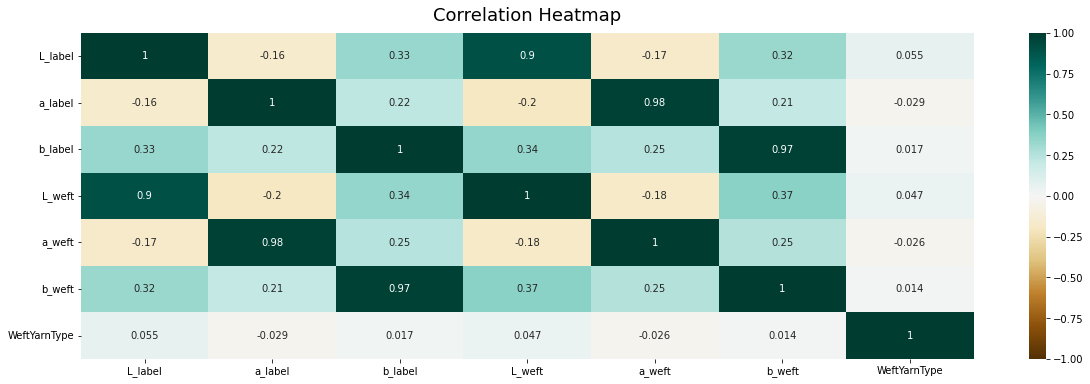

In [9]:
#Defining the figure size
plt.figure(figsize=(20, 6))

#Generating the heatmap
heatmap = sns.heatmap(new_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

#Setting the title
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

#Saving the heatmap as a .png file
#dpi - sets the resolution of the saved image in dots/inches
#bbox_inches - when set to 'tight' - does not allow the labels to be cropped

plt.savefig('plot1.png', dpi=300, bbox_inches='tight')

We can clearly see that there are some important relationships between some variables and targets (for instance: a_label and a_weft)
Let's try to visualize this relationship

2 - Scatter plot for a label and target

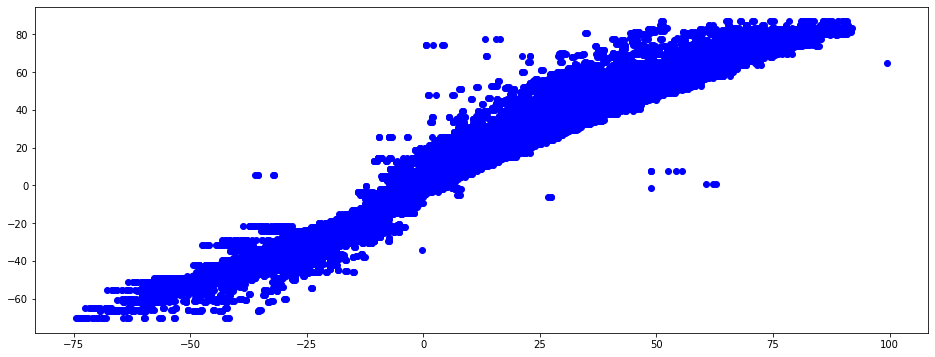

In [10]:
#Defining the figure size
plt.figure(figsize=(16, 6))

#Generating the scatter plot between two columns
plt.scatter(new_df.a_label,new_df.a_weft,c="blue")

#Saving the scatter plot as a .png file

plt.savefig('plot2.png', dpi=300, bbox_inches='tight')

3 - Scatter plot for b label and target

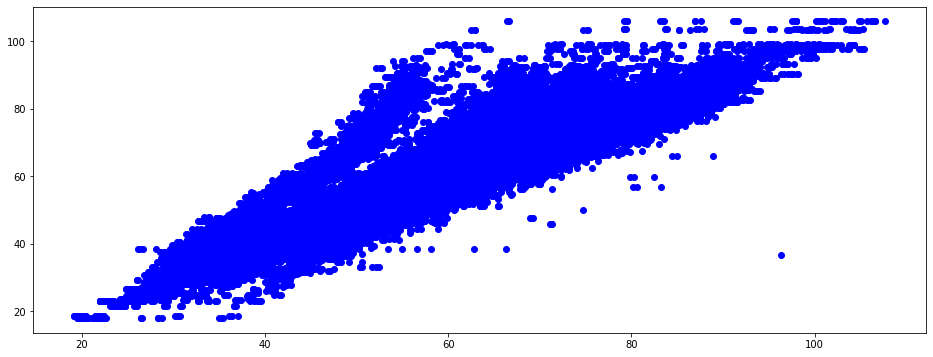

In [11]:
#Defining the figure size
plt.figure(figsize=(16, 6))

#Generating the scatter plot between two columns
plt.scatter(new_df.L_label,df.L_weft,c="blue")

#Saving the scatter plot as a .png file

plt.savefig('plot3.png', dpi=300, bbox_inches='tight')